In [4]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
# loading data 
dataset=pd.read_csv("./Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [84]:
features=dataset.iloc[:,1:2].values
label=dataset.iloc[:,2:].values

In [85]:
# import thing that,SVR is no common,so it it not doing features scaling for us,we have to do manually

In [86]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
SC_X=StandardScaler()
SC_y=StandardScaler()
features=SC_X.fit_transform(features)
label=SC_y.fit_transform(label)


In [87]:
# let do with another way called minmaxscaler
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X=min_max.fit_transform(features)
y=min_max.fit_transform(label)

In [97]:
# now let fit it to the model 
from sklearn.svm import SVR
model=SVR(kernel='rbf',degree=2,epsilon=0.01)
model2=SVR()
model2.fit(X,y)
model.fit(features,label)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(degree=2, epsilon=0.01)

In [99]:
model.score(features,label)
# model2.score(X,y)

0.7565404735636079

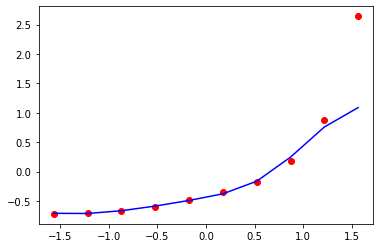

In [100]:
# visualize it
plt.scatter(features,label,color="red")
plt.plot(features,model.predict(features),color="blue")
plt.show()

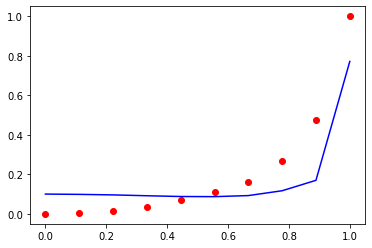

In [101]:
# visualize it
plt.scatter(X,y,color="red")
plt.plot(X,model2.predict(y),color="blue")
plt.show()

In [92]:
# new predictation 
# as the values are in scaled so we need to gives values as well in scale form
y_pred=model.predict(SC_X.transform(np.array([[6.5]])))

In [93]:
y_pred
# what???? 0.011 what is this??
# acutally the issue is that,we gives in scale so we will receive in scale as well,so avoid this we need inveser transfrom
y_pred=SC_y.inverse_transform(model.predict(SC_X.transform(np.array([[6.5]]))))